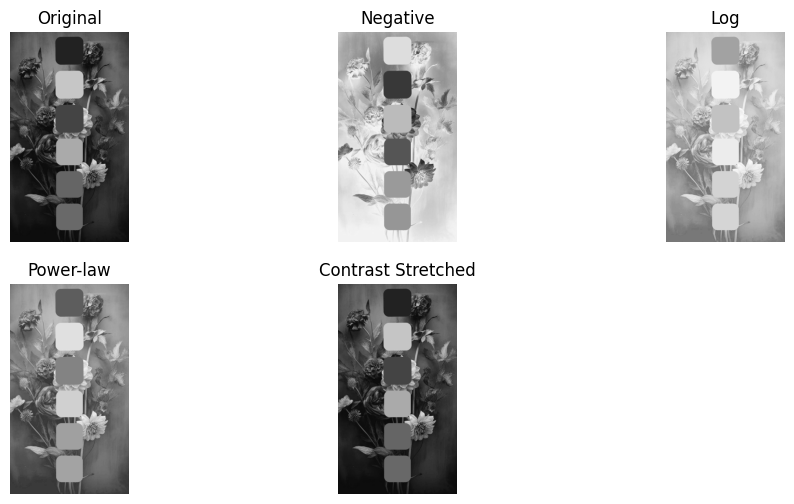

In [1]:
import cv2
import numpy as np
image = cv2.imread('download.jfif', cv2.IMREAD_GRAYSCALE)
negative_image = 255 - image
c = 255 / np.log(1 + np.max(image))
log_transformed = c * (np.log(image + 1))
gamma = 0.5
power_law_transformed = np.power(image / float(np.max(image)),
gamma) * 255
min_intensity = np.min(image)
max_intensity = np.max(image)
a = 0
b = 255
contrast_stretched = (image - min_intensity) * ((b - a) /
(max_intensity - min_intensity)) + a
log_transformed = np.uint8(log_transformed)
power_law_transformed = np.uint8(power_law_transformed)
contrast_stretched = np.uint8(contrast_stretched)
import matplotlib.pyplot as plt

titles = ['Original', 'Negative', 'Log', 'Power-law', 'Contrast Stretched']
images = [image, negative_image, log_transformed, power_law_transformed, contrast_stretched]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

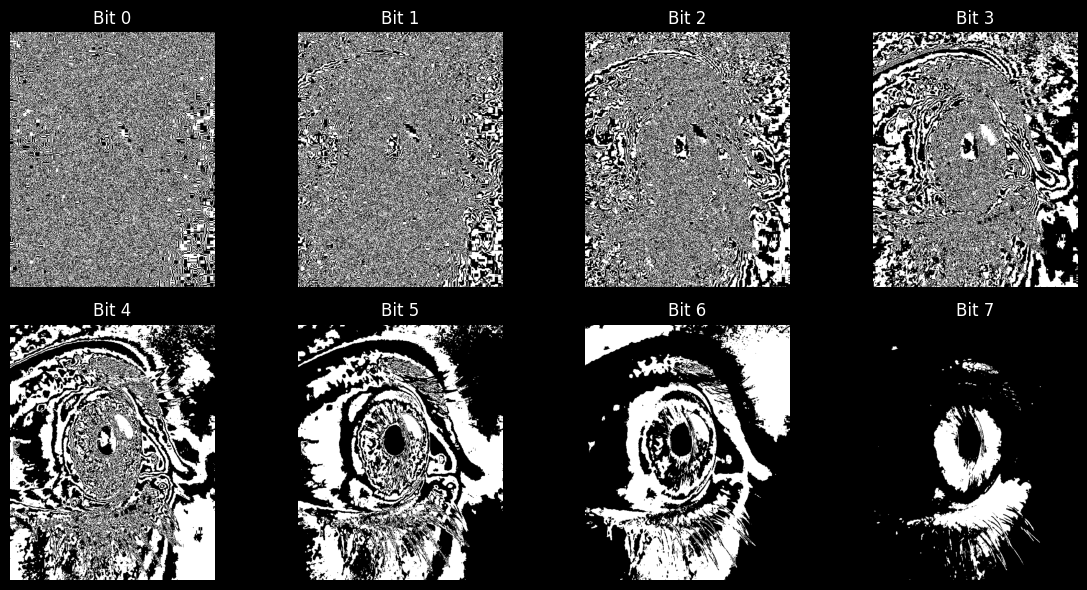

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def bit_plane_slice(image,bit):
    plane=np.bitwise_and(image,2**bit)
    plane = np.where(plane > 0, 255, 0).astype(np.uint8)
    return plane
image=cv2.imread('grayimage.jpeg',cv2.IMREAD_GRAYSCALE)
num_bits=8
bit_planes=[bit_plane_slice(image,bit)for bit in range(num_bits)]
plt.figure(figsize=(12, 6), facecolor='black')
for bit,plane in enumerate(bit_planes):
    plt.subplot(2, 4, bit+1)
    plt.imshow(plane, cmap='gray')
    plt.title(f'Bit {bit}', color='white')
    plt.axis('off')
plt.tight_layout()
plt.show()

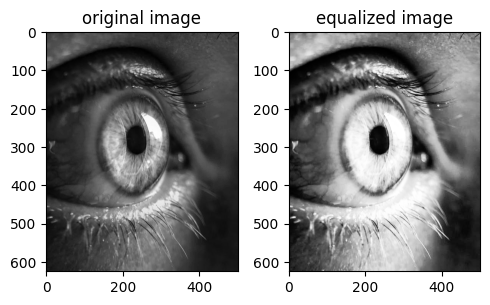

In [4]:
image=cv2.imread('grayimage.jpeg',cv2.IMREAD_GRAYSCALE)
equalized_image=cv2.equalizeHist(image)
plt.figure(figsize=(5,10))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(equalized_image,cmap='gray')
plt.title('equalized image')
plt.tight_layout()
plt.show()

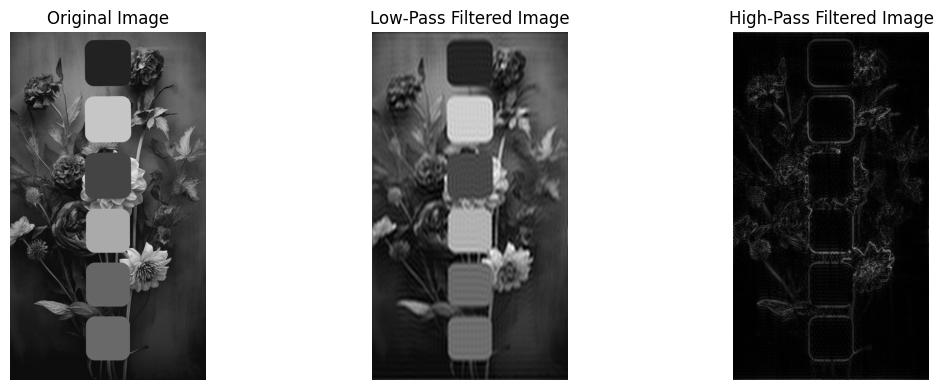

In [17]:
def apply_low_pass_filter(image, cutoff_freq):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow - cutoff_freq:crow + cutoff_freq, ccol - cutoff_freq:ccol + cutoff_freq] = 1

    dft_shift_low = dft_shift * mask
    f_ishift = np.fft.ifftshift(dft_shift_low)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

def apply_high_pass_filter(image, cutoff_freq):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    mask = np.ones((rows, cols, 2), np.uint8)
    mask[crow - cutoff_freq:crow + cutoff_freq, ccol - cutoff_freq:ccol + cutoff_freq] = 0
    dft_shift_high = dft_shift * mask
    f_ishift = np.fft.ifftshift(dft_shift_high)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

image = cv2.imread('download.jfif', cv2.IMREAD_GRAYSCALE)

cutoff_freq = 50
smoothed_image_low = apply_low_pass_filter(image, cutoff_freq)
smoothed_image_high = apply_high_pass_filter(image, cutoff_freq)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image_low, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(smoothed_image_high, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

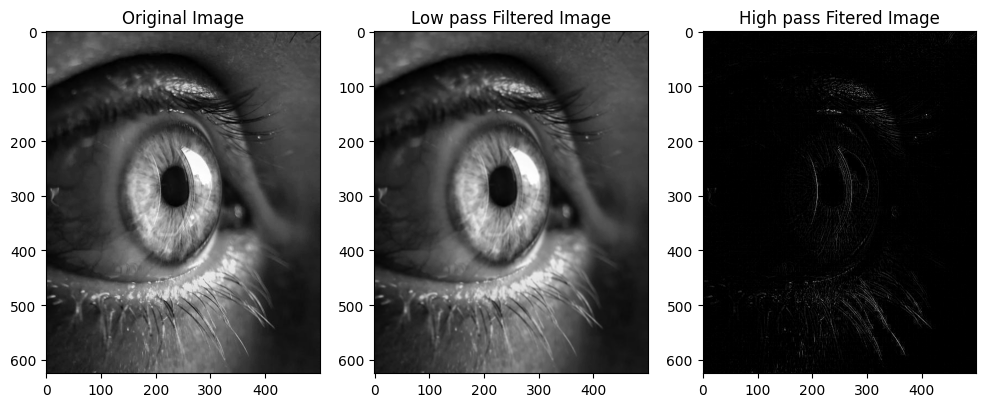

In [12]:
kernel_size=3
kernel_lp=np.ones((kernel_size, kernel_size), np.float32)/(kernel_size*kernel_size)
smoothed_image_lp=cv2.filter2D(image, -1, kernel_lp)
kernel_hp=np.array([[0, -1, 0],[-1,4,-1],[0,-1,0]])
smoothed_image_hp=cv2.filter2D(image, -1, kernel_hp)
plt.figure(figsize=(12,6))
plt.subplot(131),plt.imshow(image,cmap='gray'),plt.title('Original Image')
plt.subplot(132),plt.imshow(smoothed_image_lp,cmap='gray'),plt.title('Low pass Filtered Image')
plt.subplot(133),plt.imshow(smoothed_image_hp,cmap='gray'),plt.title('High pass Fitered Image')
plt.show()

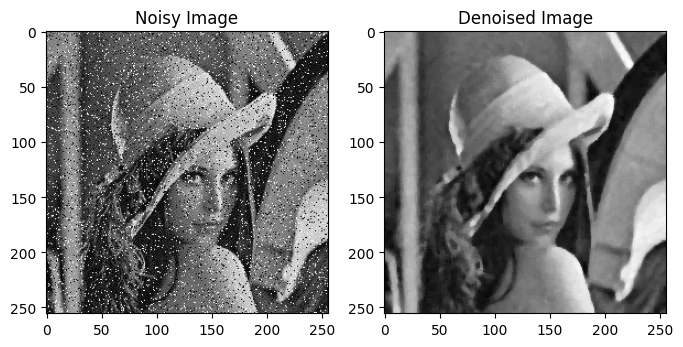

In [22]:
def remove_salt_and_pepper_noise(image):
    return cv2.medianBlur(image, 5)
noisy_img = cv2.imread('noisyimg.png', 0)
denoised_img = remove_salt_and_pepper_noise(noisy_img)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(noisy_img,cmap='gray'),plt.title('Noisy Image')
plt.subplot(1, 2, 2)
plt.imshow(denoised_img,cmap='gray'),plt.title('Denoised Image')
plt.show()